In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F#i assume this is the functional api

In [15]:
#Lets define our neural network
class Perceptron(nn.Module):

    def __init__(self):
        super(Perceptron, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)
    #we define this function to tell the network how to pass the input through the network.
    #the backwards function will automatically be defines using autograd
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = (self.fc2(x))
        return x


In [16]:
classifier = Perceptron()
print(classifier)

Perceptron(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)


In [17]:
xor = pd.DataFrame({'X1':[0.,0.,1.,1.], 'X2':[0.,1.,0.,1.], 'y':[0,1,1,0]})
xor

,X1,X2,y
0,0.0,0.0,0
1,0.0,1.0,1
2,1.0,0.0,1
3,1.0,1.0,0


In [18]:
#Lets load in our datasets:
import torch.utils.data as data_utils
#Why do we have to use from numpy?
features = torch.from_numpy(xor.iloc[:,:2].values).float()
targets = torch.from_numpy(xor.iloc[:,2].values).long()
train = data_utils.TensorDataset(features, targets)
trainloader = data_utils.DataLoader(train, batch_size=1, shuffle=True)

In [19]:
import torch.optim as optim
epochs = 10000
criterion = F.cross_entropy#loss function
optimizer = optim.SGD(classifier.parameters(), lr=0.001)
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        x, labels = data
        # zero the parameter gradients, we do not want to keep adding to the gradient after each minibatch
        #what if we didnt do this?
        optimizer.zero_grad()
        
        #forward
        y_hat = classifier(x)
        loss = criterion(y_hat, labels)#get the loss between the target and output, gets us our error
        running_loss += loss
        #backwards
        loss.backward()#back prop
        
        #Gradient Descent
        optimizer.step()#perform stochastic gradient desent.
    if epoch % 500 == 0:
        print('Epoch: {}, loss: {}'.format(epoch, running_loss/len(train)))
print("Training Done")

Epoch: 0, loss: 0.6867968440055847
Epoch: 500, loss: 0.6757012009620667
Epoch: 1000, loss: 0.6650758981704712
Epoch: 1500, loss: 0.6516917943954468
Epoch: 2000, loss: 0.6343511343002319
Epoch: 2500, loss: 0.6118475794792175
Epoch: 3000, loss: 0.5830647349357605
Epoch: 3500, loss: 0.5471850037574768
Epoch: 4000, loss: 0.5039811134338379
Epoch: 4500, loss: 0.4542961120605469
Epoch: 5000, loss: 0.40044963359832764
Epoch: 5500, loss: 0.34604060649871826
Epoch: 6000, loss: 0.294829398393631
Epoch: 6500, loss: 0.24949020147323608
Epoch: 7000, loss: 0.21110984683036804
Epoch: 7500, loss: 0.17951133847236633
Epoch: 8000, loss: 0.15385007858276367
Epoch: 8500, loss: 0.1330862194299698
Epoch: 9000, loss: 0.11623917520046234
Epoch: 9500, loss: 0.1024802178144455
Training Done


tensor([[1., 0.]])

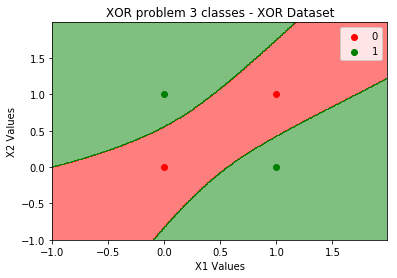

In [22]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = xor.iloc[:,:2].values, xor.iloc[:,2].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
input_ = torch.tensor(np.array([X1.ravel(), X2.ravel()]).T).float()
plt.contourf(X1, X2, torch.argmax(classifier(input_), dim=1).detach().numpy().reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('XOR problem 3 classes - XOR Dataset')
plt.xlabel('X1 Values')
plt.ylabel('X2 Values')
plt.legend()
plt.show()